In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lambertw 
import pandas as pd
import sys
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sys.path.append('..')

In [6]:
def cases(beta,gamma,eps,I0):
    if(eps > 0):
        R0 = beta/gamma 
        alpha = (1/R0) + eps + I0
        beta2 = np.log((1/R0) + eps)
        gamma = R0
        C = (1/gamma)*(lambertw(-gamma*np.exp(beta2 - alpha*gamma)) + (alpha*gamma))
    else:
        C = 1
    return np.real(C)

In [7]:
def avg_2(x):
    res = []
    for i in range(len(x)-1):
        res.append((x[i]+x[i+1])/2)
    return res

In [8]:
files = ['measles/measles_-0.05/GTP_fsize_inf_2e-06_-0.05_500000.csv',
        'measles/measles_-0.03/GTP_fsize_inf_2e-06_-0.03_500000.csv',
        'measles/measles_-0.01/GTP_fsize_inf_2e-06_-0.01_500000.csv',
        'measles/measles_0/GTP_fsize_inf_2e-06_0_500000.csv',
        'measles/measles_0.01/GTP_fsize_inf_2e-06_0.01_500000.csv',
        'measles/measles_0.03/GTP_fsize_inf_2e-06_0.03_500000.csv',
        'measles/measles_0.05/GTP_fsize_inf_2e-06_0.05_500000.csv',
        'measles/measles_0.1/GTP_fsize_inf_2e-06_0.1_500000.csv']
N_vec = [1000,5000,10000,50000,100000,500000]
eps_vec = [-0.05,-0.03,-0.01,0,0.01,0.03,0.05,0.1]

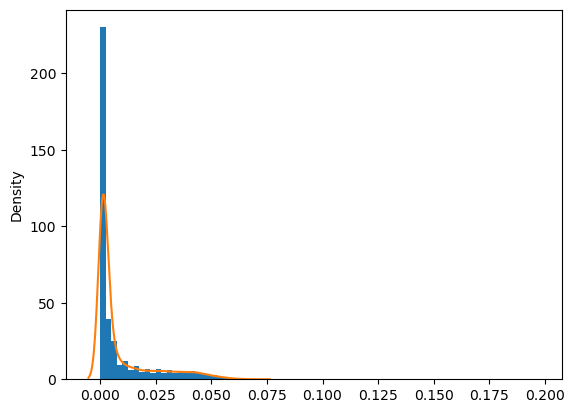

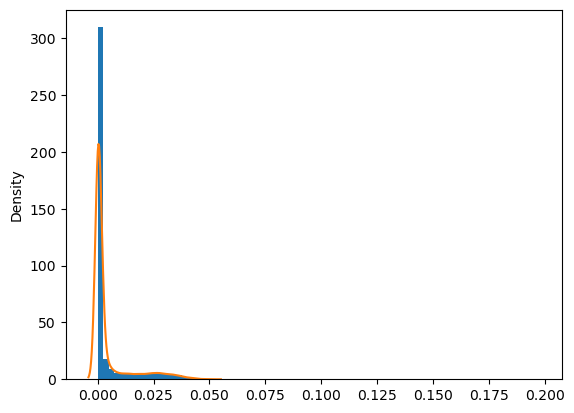

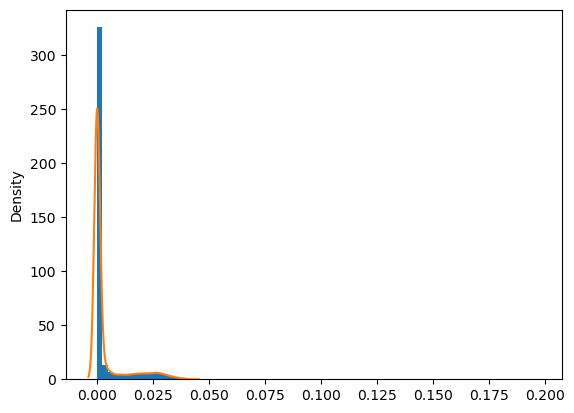

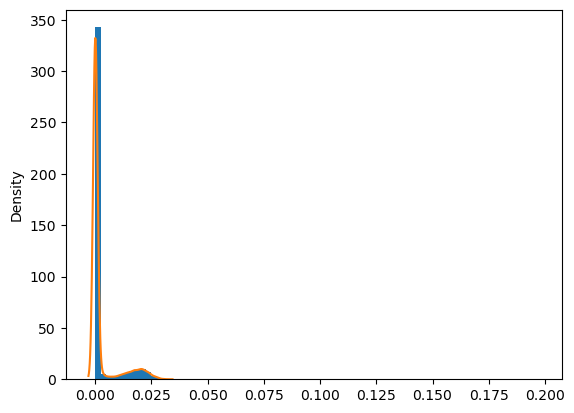

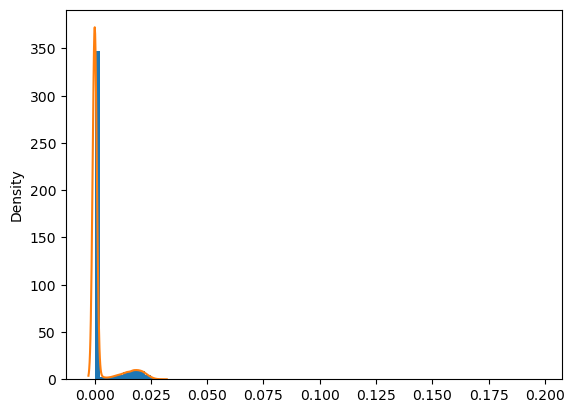

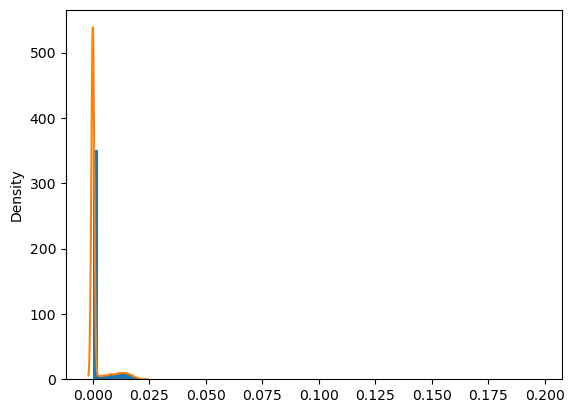

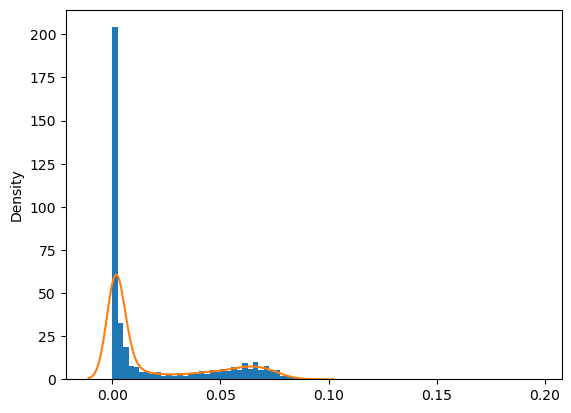

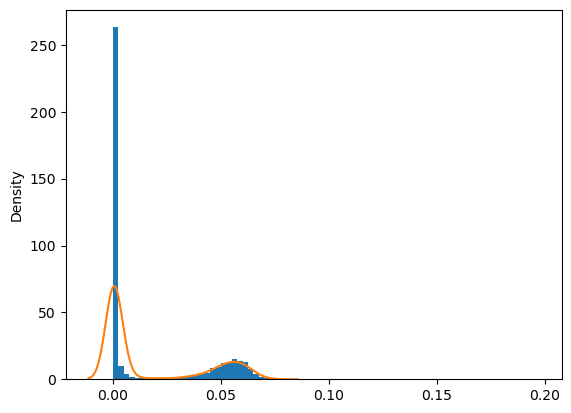

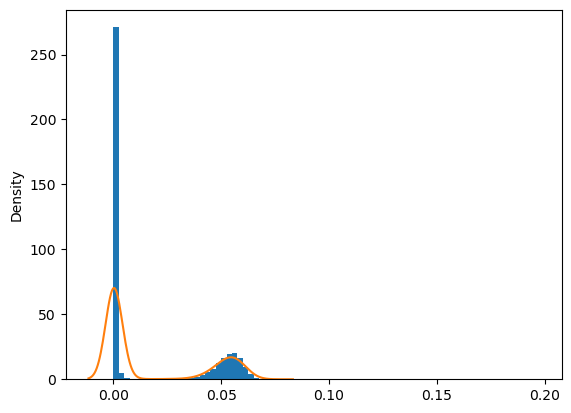

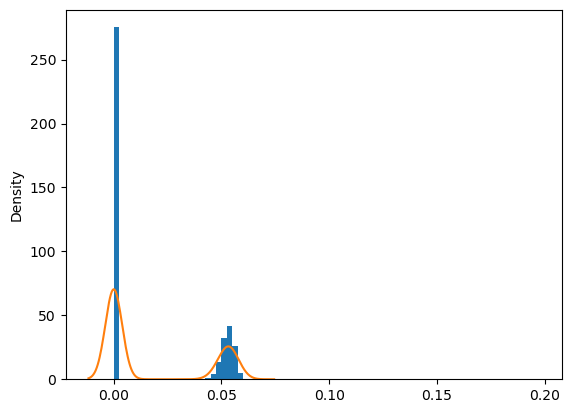

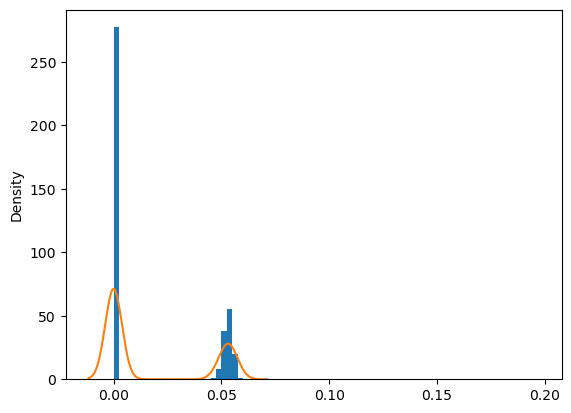

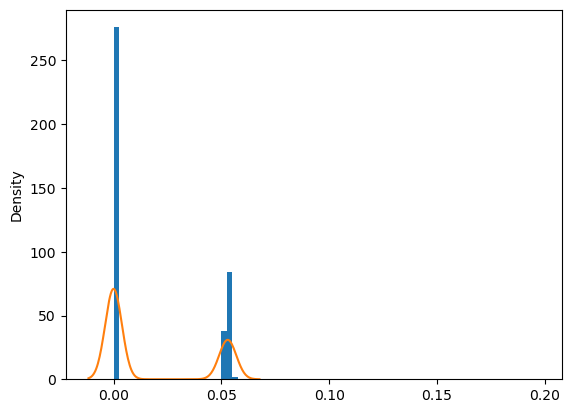

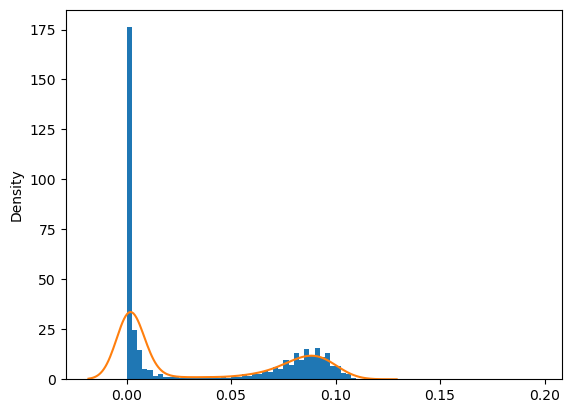

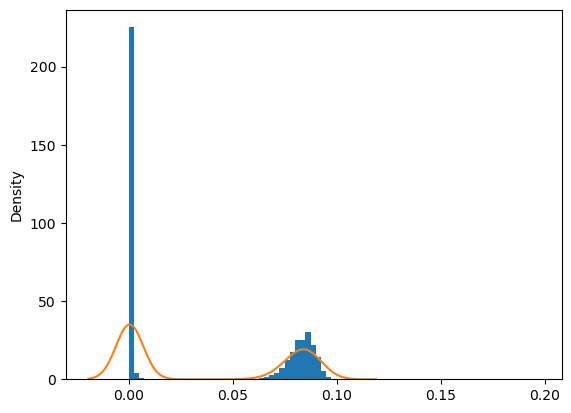

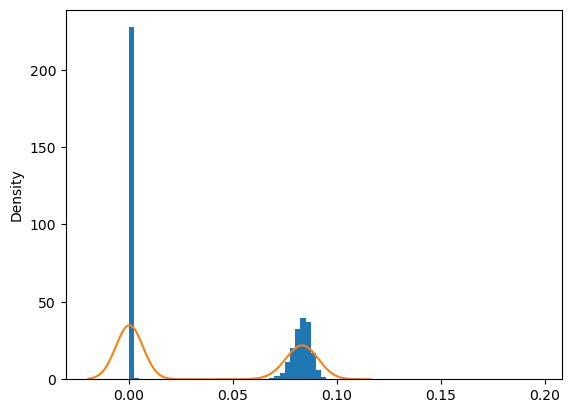

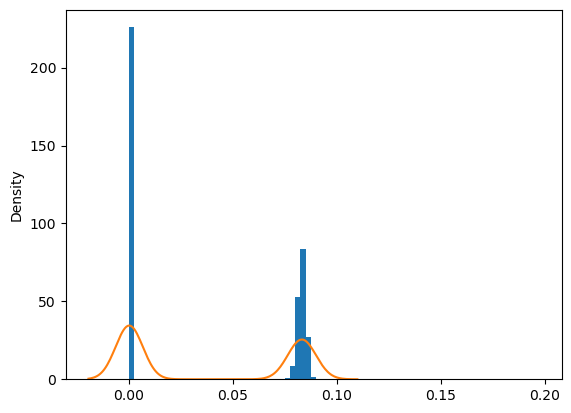

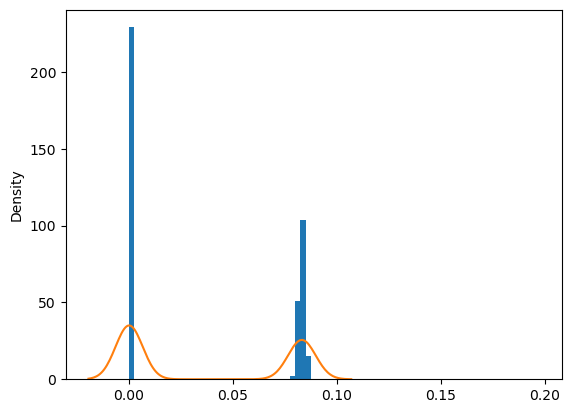

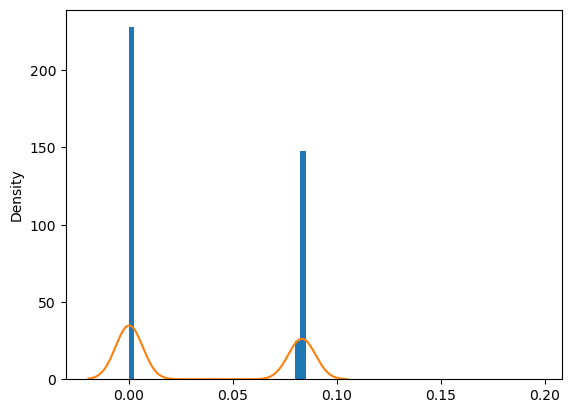

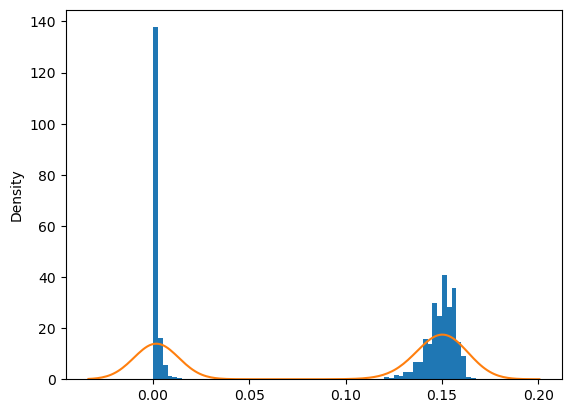

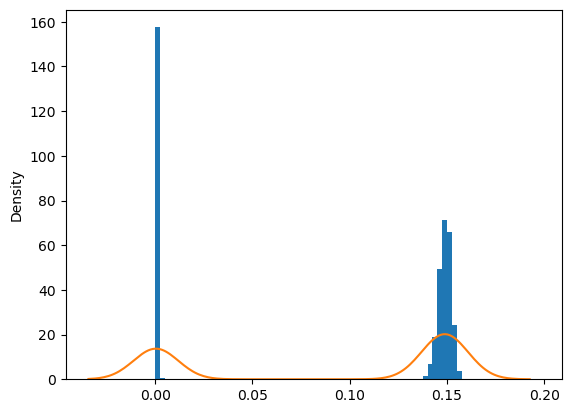

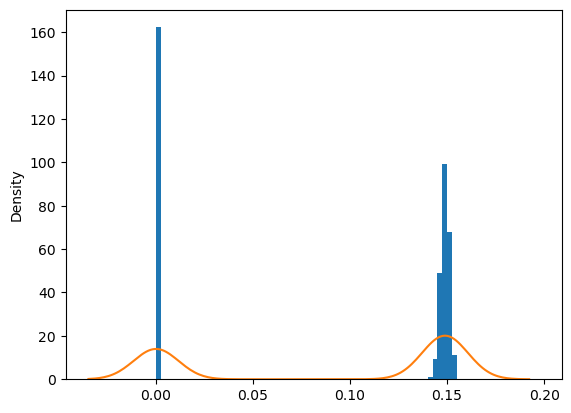

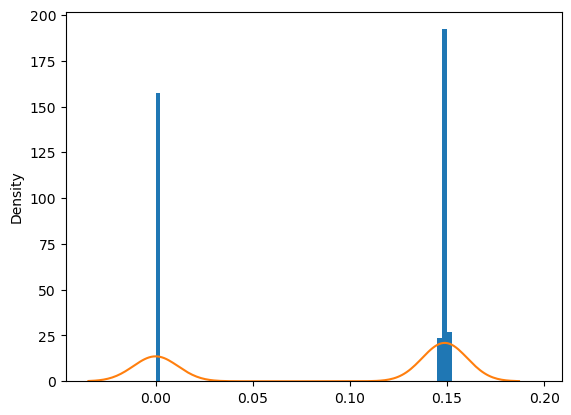

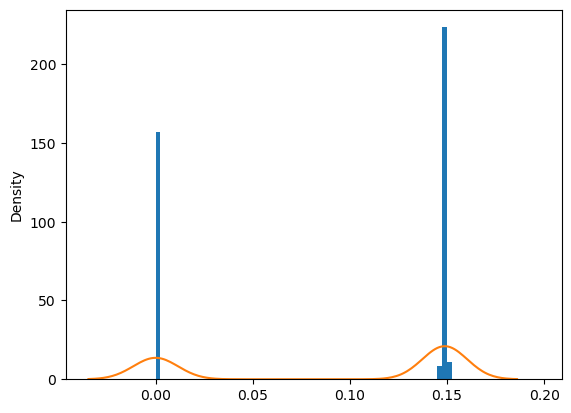

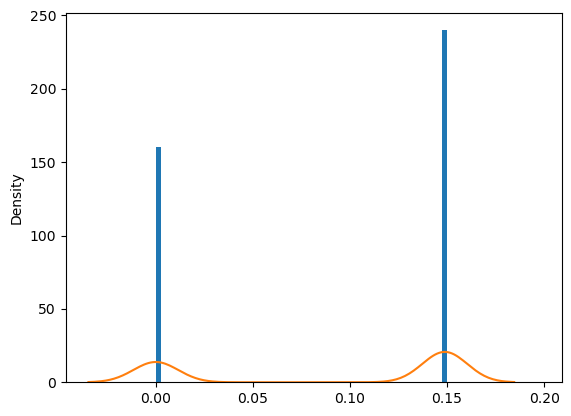

In [9]:
N_vec = np.array([1000, 5000, 10000, 50000, 100000, 500000])

eps_res = np.array([0.01,0.03,0.05,0.1])

list_mean_big = []
list_mean_small = []
list_std_big = []
list_std_small = []
c = 4

for i in range(len(eps_res)):
    mean_big_list = []
    mean_small_list = []
    std_big_list = []
    std_small_list = []
    df = np.loadtxt(files[c])
    for j in range(len(N_vec)):
        a = plt.hist(df[j]/N_vec[j],bins = np.arange(0,0.2,0.0025), density = True)
        sns.kdeplot(df[j]/N_vec[j])
        n_half = np.argmin(abs(a[1]-(cases(3,0.2,eps_res[i],1/N_vec[j])/2)))
        i_half = avg_2(a[1])
        inf_min = 0.0025*np.sum(a[0][:n_half]*i_half[:n_half])
        inf_max = 0.0025*np.sum(a[0][n_half:]*i_half[n_half:])
        std_min = 0.0025*np.sum(a[0][:n_half]*(i_half[:n_half]-inf_min)**2)
        std_max = 0.0025*np.sum(a[0][n_half:]*(i_half[n_half:]-inf_max)**2)
        mean_small_list.append(inf_min)
        mean_big_list.append(inf_max)
        std_small_list.append(std_min)
        std_big_list.append(std_max)
        plt.show() 
    list_mean_big.append(mean_big_list)
    list_mean_small.append(mean_small_list)
    list_std_big.append(std_big_list)
    list_std_small.append(std_small_list)
    c = c + 1

In [10]:
res_min = np.array(list_mean_small).transpose()
res_max = np.array(list_mean_big).transpose()
std_min = np.array(list_std_small).transpose()
std_max = np.array(list_std_big).transpose()

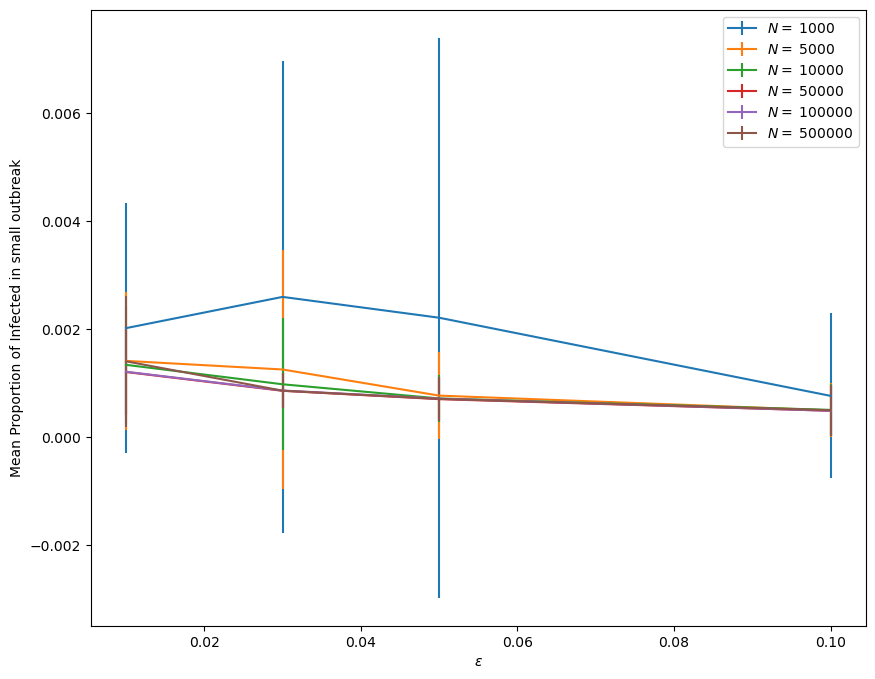

In [13]:
fig, ax = plt.subplots(figsize = (10,8))
for i in range(len(N_vec)):
    ax.errorbar(eps_res,res_min[i,:], yerr = np.sqrt(std_min[i,:]), label = r'$N =$ '+str(N_vec[i]))
plt.ylabel('Mean Proportion of Infected in small outbreak')
plt.xlabel(r'$\epsilon$')
plt.legend()
plt.show()

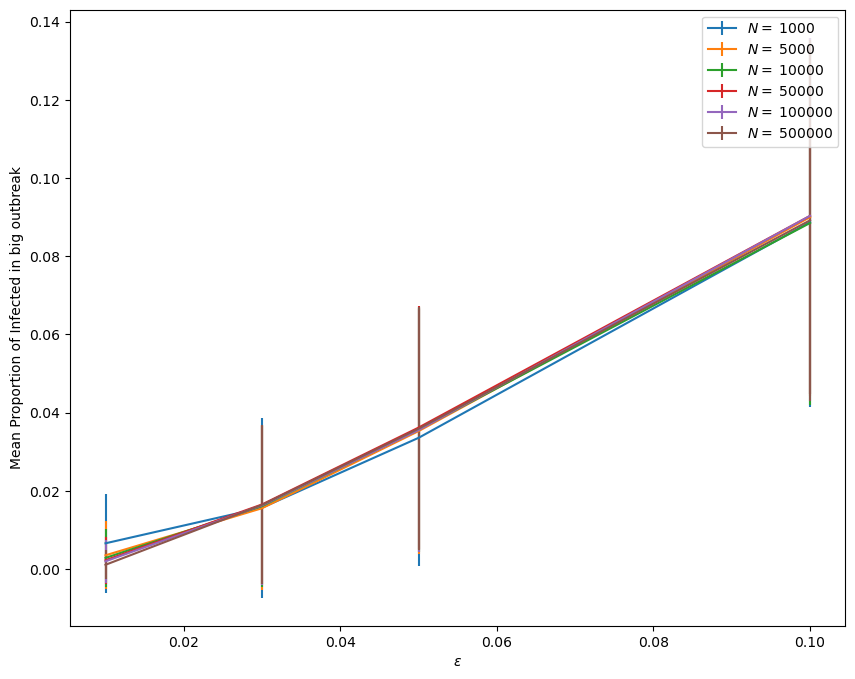

In [14]:
fig, ax = plt.subplots(figsize = (10,8))
for i in range(len(N_vec)):
    ax.errorbar(eps_res,res_max[i,:], yerr = np.sqrt(std_max[i,:]), label = r'$N =$ '+str(N_vec[i]))
plt.ylabel('Mean Proportion of Infected in big outbreak')
plt.xlabel(r'$\epsilon$')
plt.legend()
plt.show()

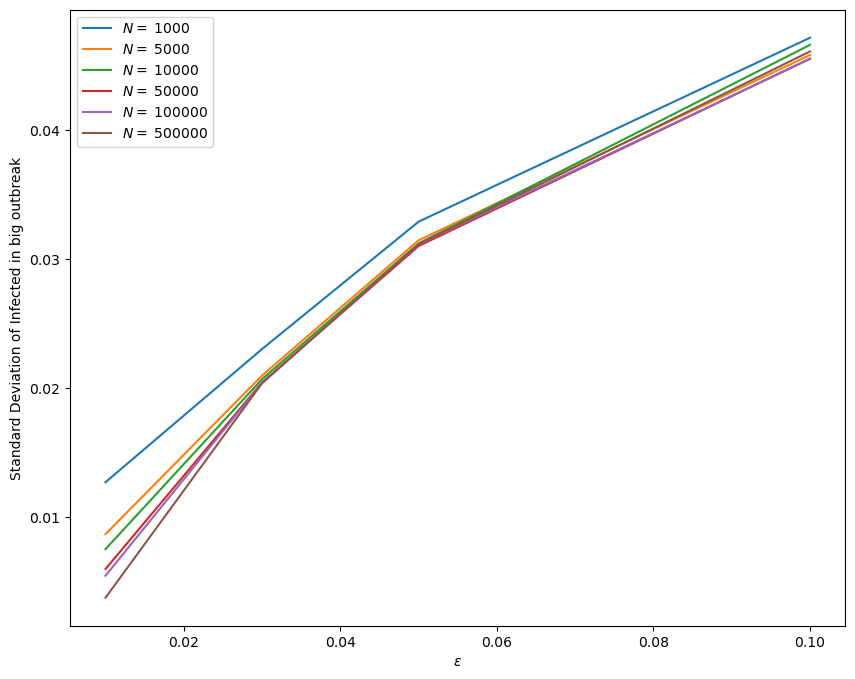

In [15]:
fig, ax = plt.subplots(figsize = (10,8))
for i in range(len(N_vec)):
    ax.plot(eps_res,np.sqrt(std_max[i,:]), label = r'$N =$ '+str(N_vec[i]))
plt.ylabel('Standard Deviation of Infected in big outbreak')
plt.xlabel(r'$\epsilon$')
plt.legend()
plt.show()